In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from math import comb

In [3]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report (print) the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

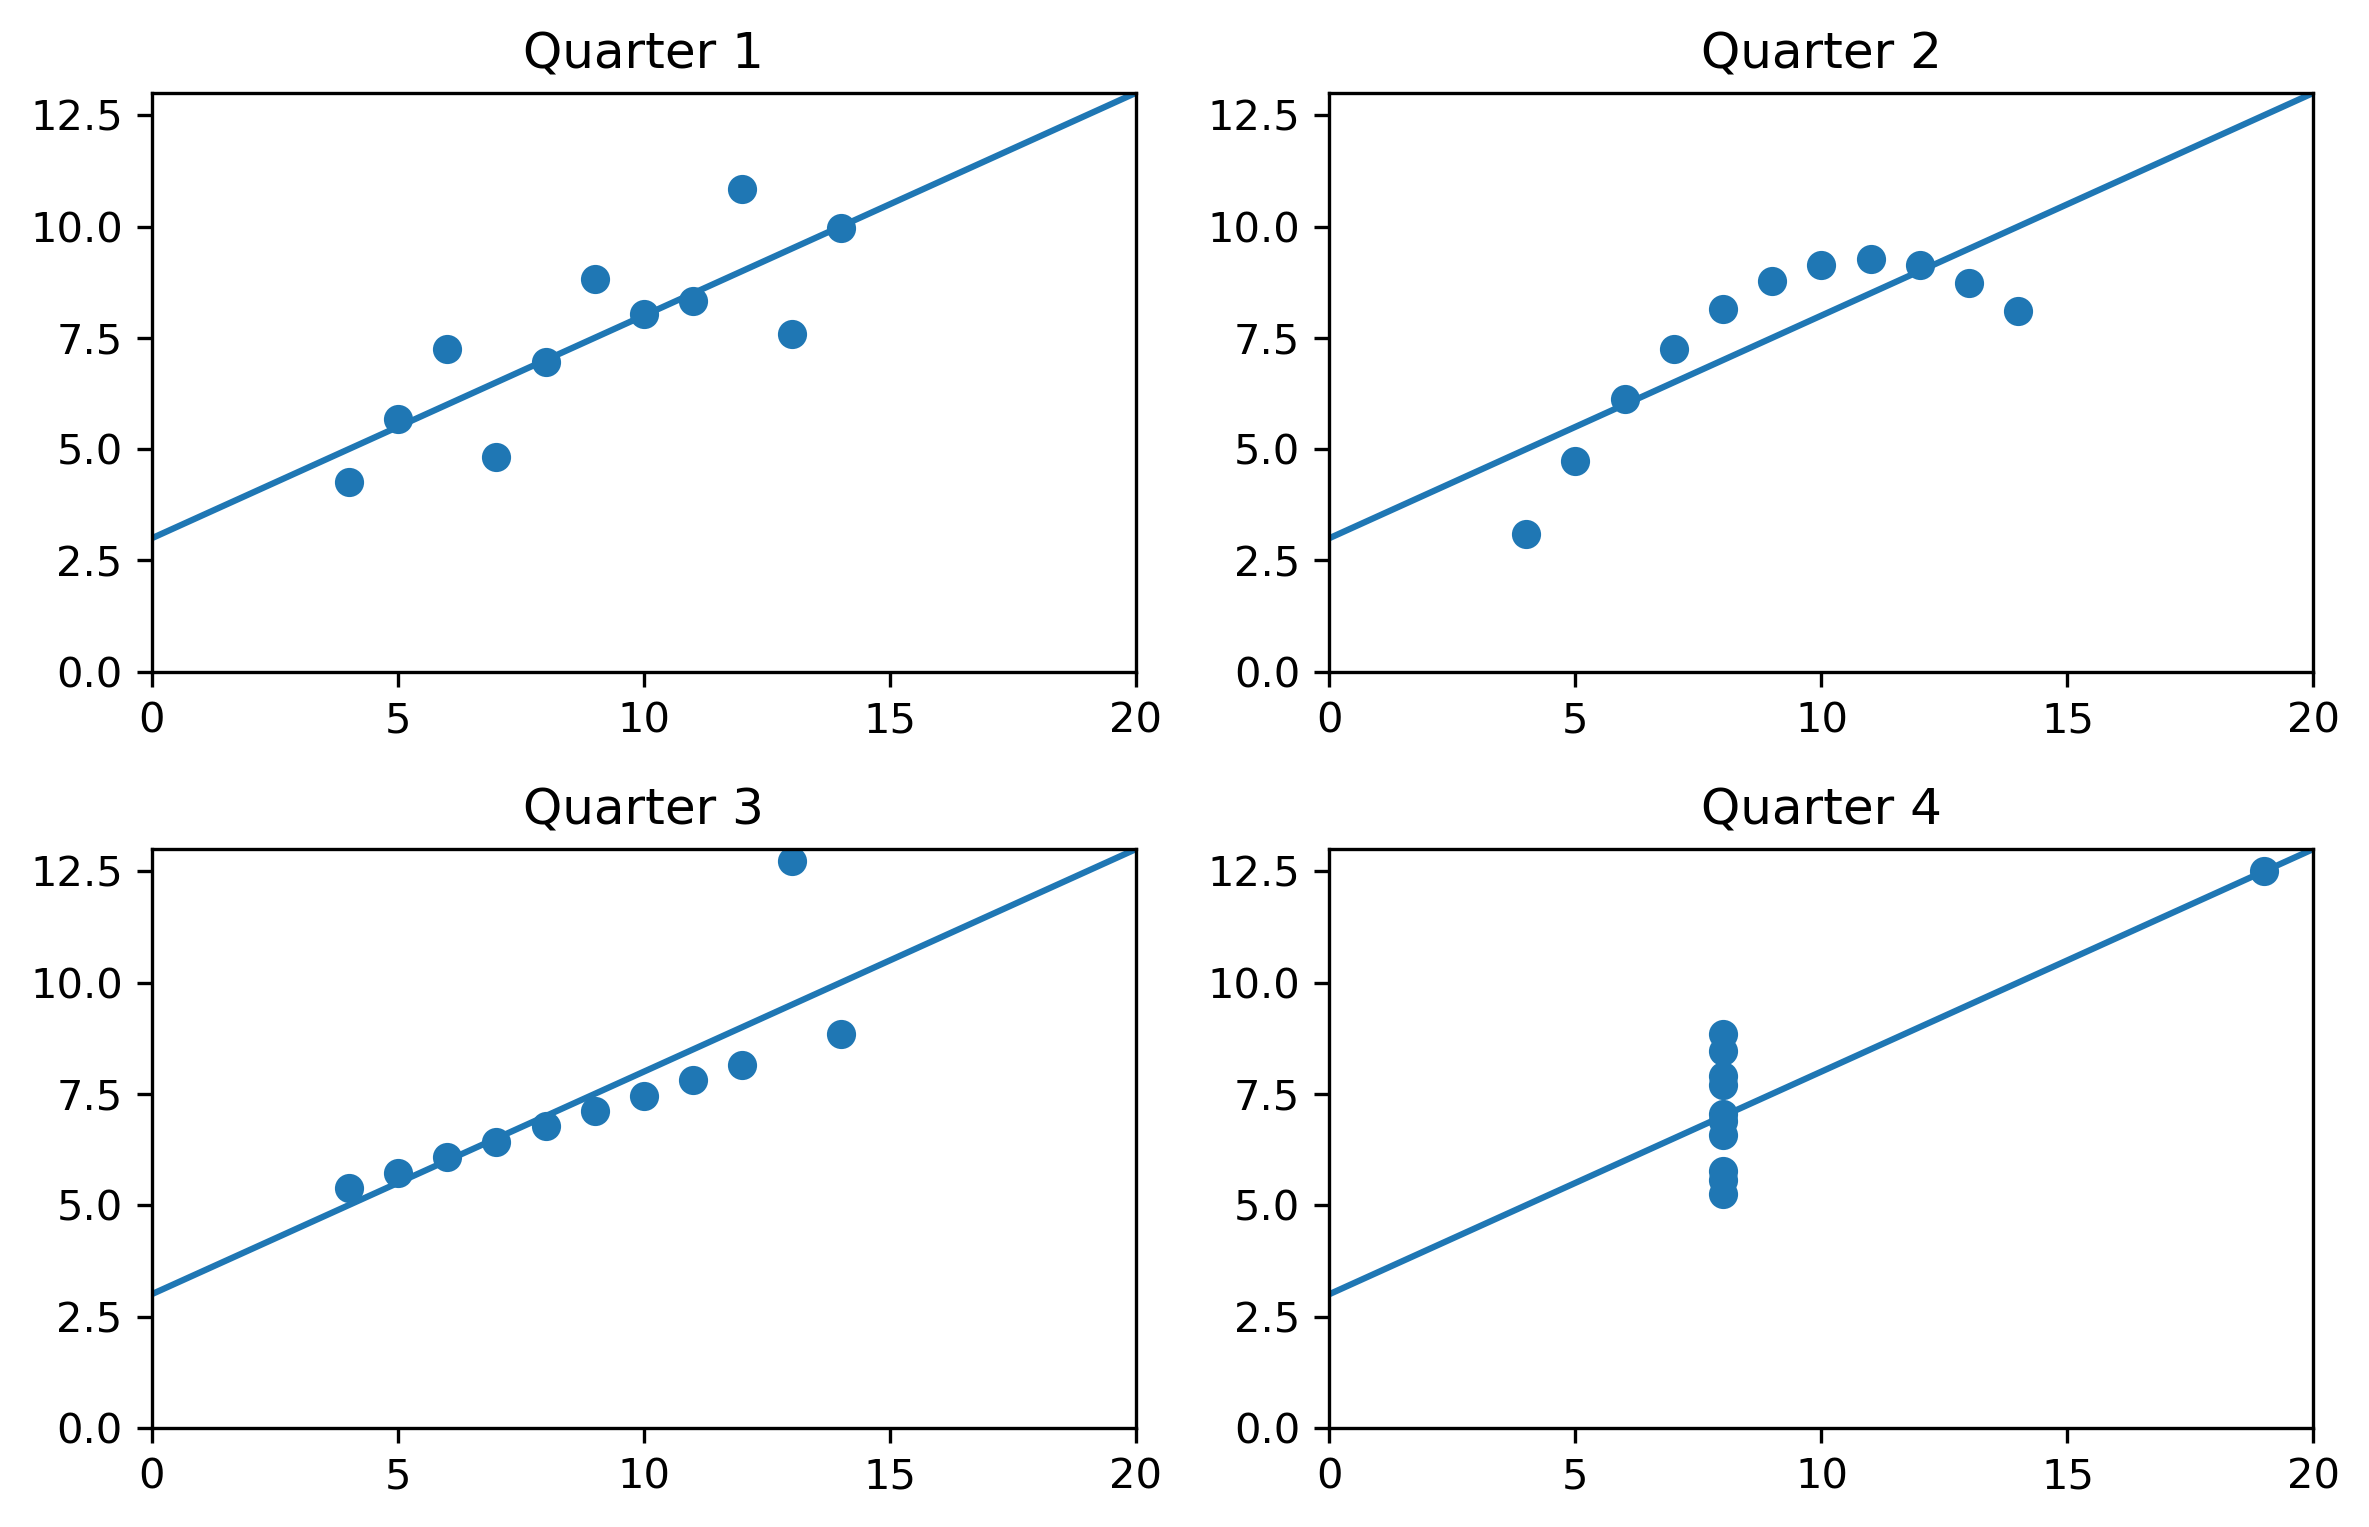

In [4]:
A = np.load("anscombe.npy")

#divide by quarter
q1 = A[:,:2]
q2 = A[:,2:4]
q3 = A[:,4:6]
q4 = A[:,6:]

domain = np.linspace(0,20,100)

#create dictionary for ease of printing data later
data = {}
Q = [q1,q2,q3,q4]
c = 0

#fix figsize
fig = plt.figure(figsize=(8,10))

for i in Q: # loop through each quarter 
    c += 1
    ax = fig.add_subplot(4,2,c) # create a new subplot

    #make all calculations requested
    xmean = np.mean(i[:,0])
    xvariance = np.var(i[:,0])
    ymean = np.mean(i[:,1])
    yvariance = np.var(i[:,1])
    slope,intercept,coeff = st.linregress(i[:,0],i[:,1])[:3]

    #add them to a dictionary
    data['q{}'.format(c)] = [(xmean,f'{ymean:.3f}'),(xvariance,f'{yvariance:.3f}'),f'{slope:.3f}',f'{intercept:.3f}',f'{coeff:.3f}']
    
    #plot them in subplots
    plt.xlim((0,20))
    plt.ylim((0,13))
    plt.title('Quarter {}'.format(c))
    ax.scatter(i[:,0],i[:,1])
    ax.plot(domain,slope*domain + intercept)

plt.tight_layout()
plt.show()

In [5]:
#explain the findings
print ("{:<5} {:<14} {:<12} {:<6} {:<4} {:<4}".format('Q','Mean(x,y)','Var(x,y)','Slope','Intcpt','Corr'))
for k, v in data.items():
    p_mean,p_variance,p_slope,p_intercept,p_coeff = v
    print ("{:<4} {:<13} {:<14} {:<6} {:<6} {:<4}".format(k+':', str(p_mean).replace("'",""),str(p_variance).replace("'",""),p_slope,p_intercept,p_coeff))

print('\nThey all have nearly identical values for everything we calculated. '
'For Quarter 1 the data is scattered somewhat randomly. '
'Quarter 2 seems very correlated, but not linearly. '
'Quarter 3 is very correlated, but has an outlier. '
'Quarter 4 has no variance in x except for an outlier throwing off the sample. '
"It's clear to see that we need to look at our data first before running calculations. "
'Clearly all but Quarter 1 are extremely correlated but have outliers or is not linear which would dramatically change our calculations.'
)

Q     Mean(x,y)      Var(x,y)     Slope  Intcpt Corr
q1:  (9.0, 7.501)  (10.0, 3.752)  0.500  3.000  0.816
q2:  (9.0, 7.501)  (10.0, 3.752)  0.500  3.001  0.816
q3:  (9.0, 7.500)  (10.0, 3.748)  0.500  3.002  0.816
q4:  (9.0, 7.501)  (10.0, 3.748)  0.500  3.002  0.817

They all have nearly identical values for everything we calculated. For Quarter 1 the data is scattered somewhat randomly. Quarter 2 seems very correlated, but not linearly. Quarter 3 is very correlated, but has an outlier. Quarter 4 has no variance in x except for an outlier throwing off the sample. It's clear to see that we need to look at our data first before running calculations. Clearly all but Quarter 1 are extremely correlated but have outliers or is not linear which would dramatically change our calculations.


### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.special.comb()`.)

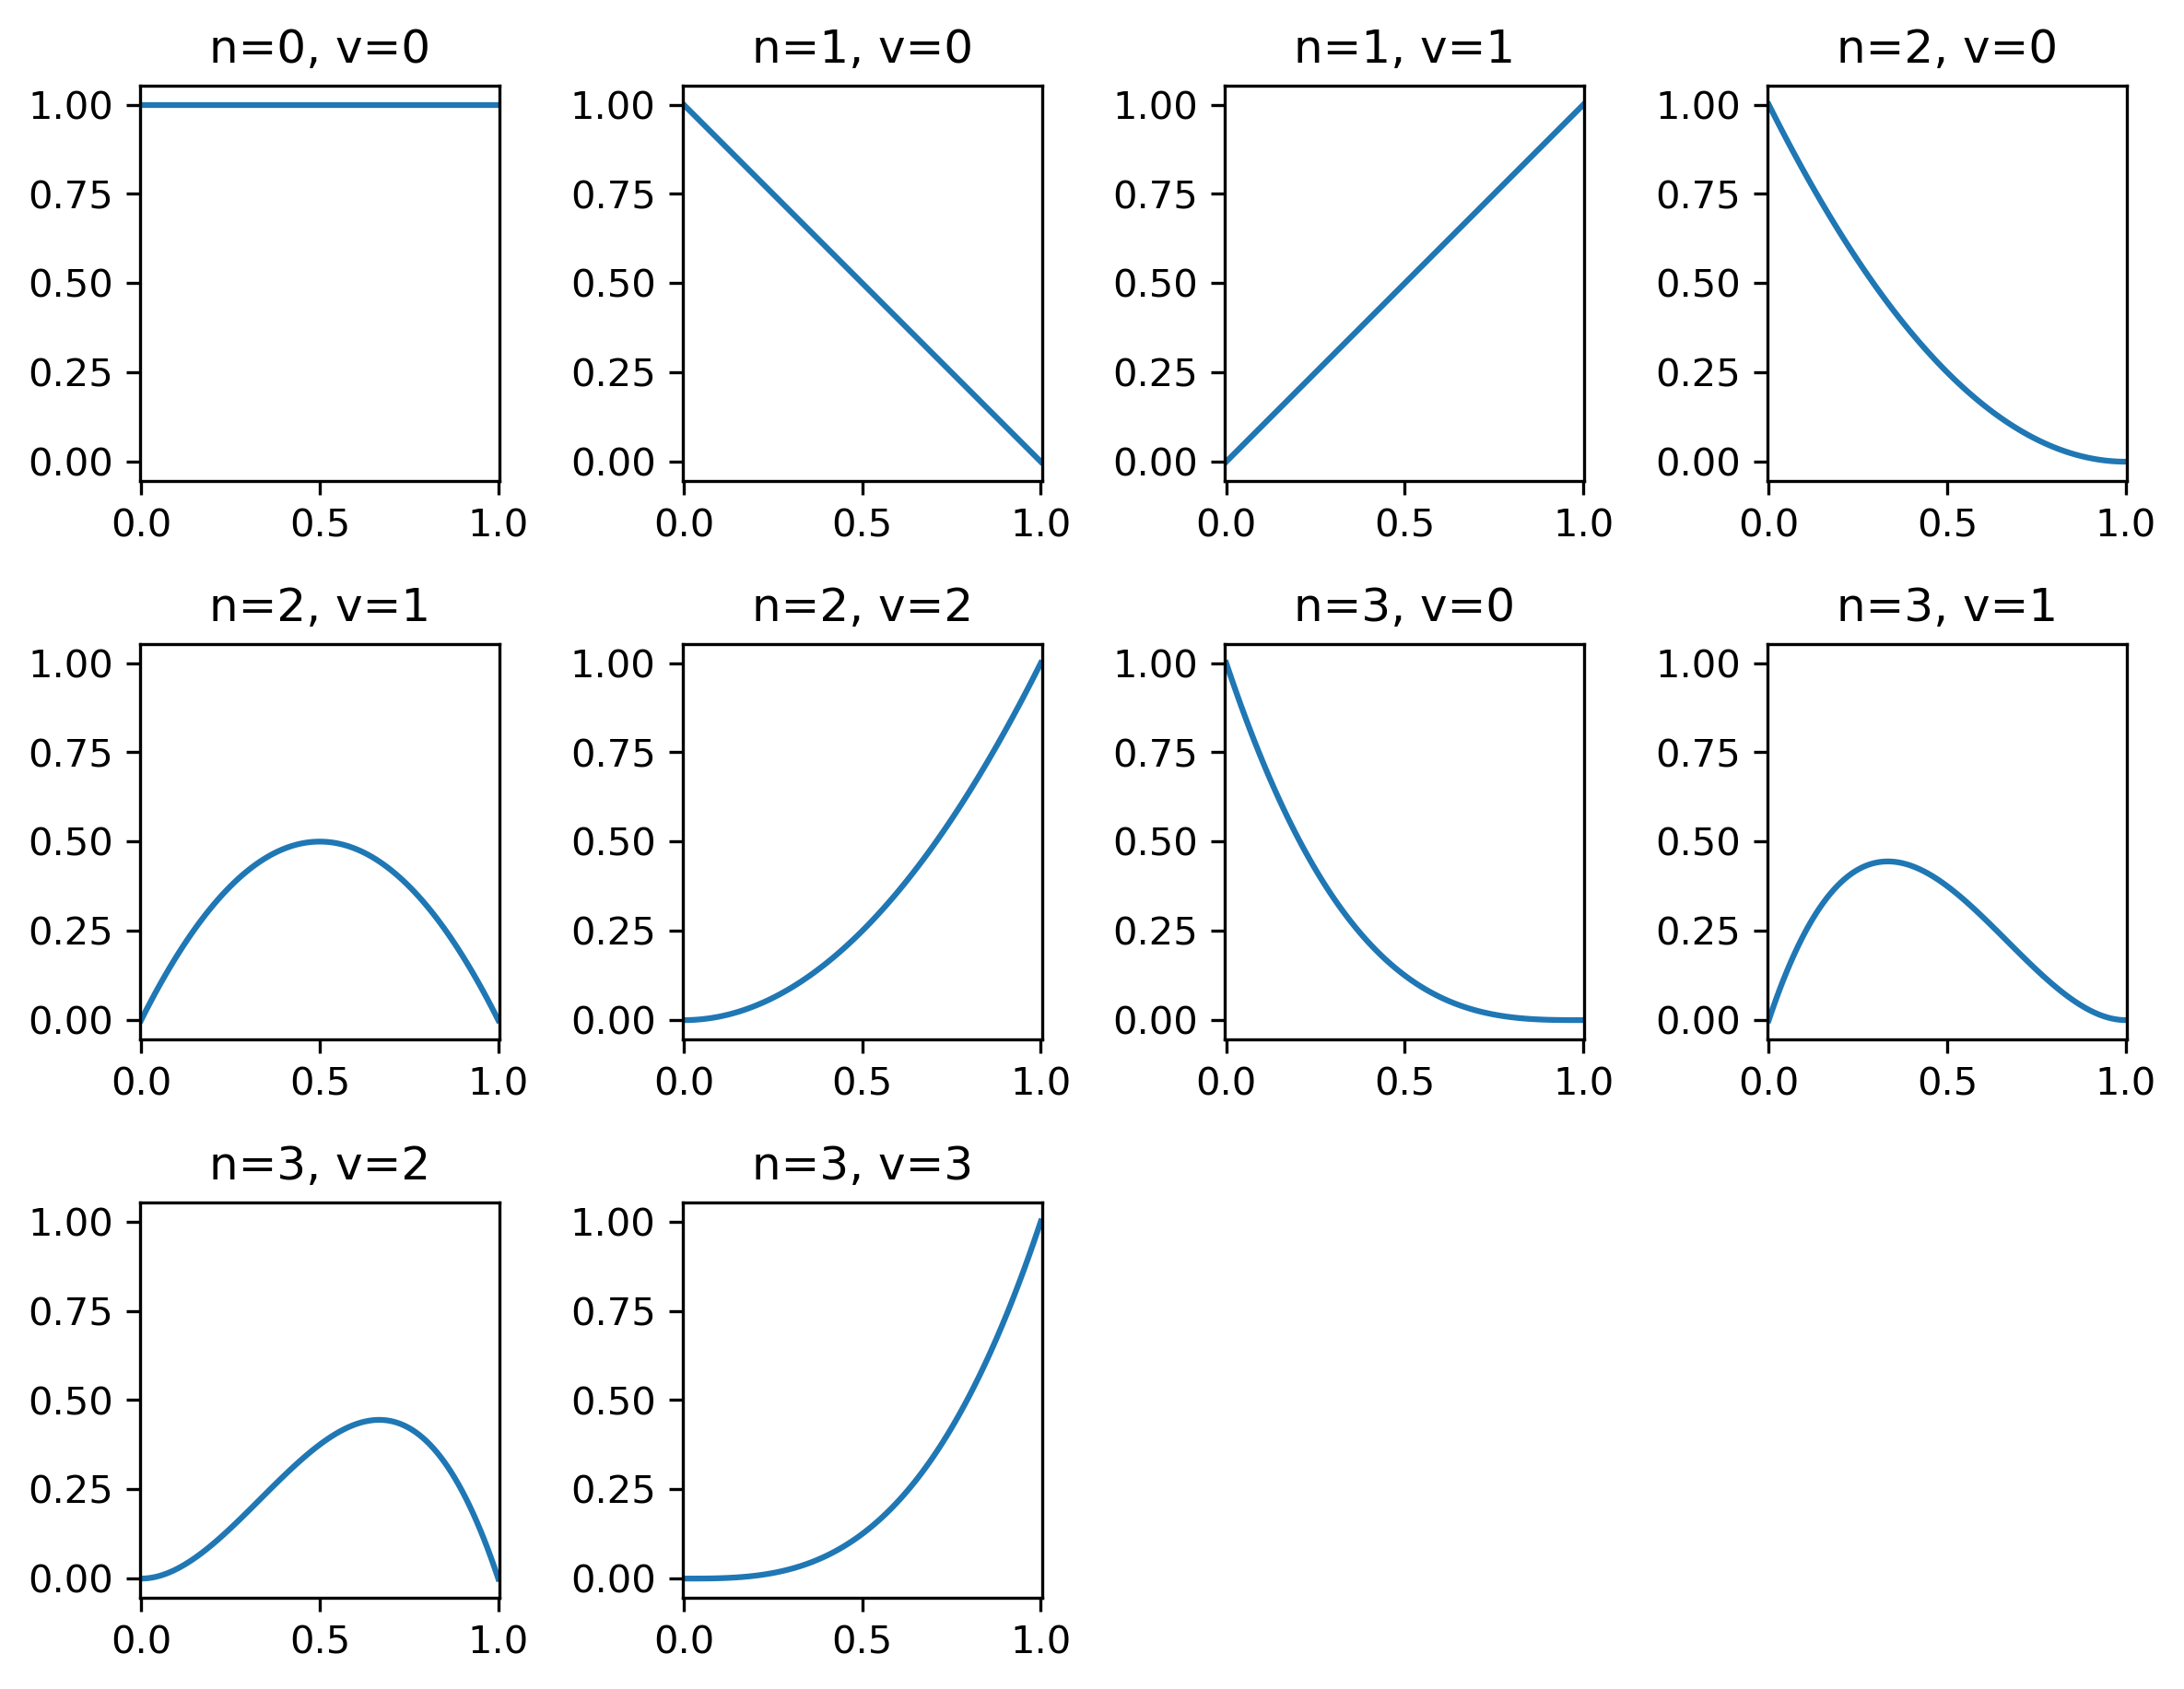

In [6]:
def bern(n,v,x): #make it easier by defining bernstein polynomial
    """Bernstein Polynomial"""
    return comb(n,v) * x**v * (1-x)**(n-v)

def plot_polynomials(): 
    '''Plot the first 10 Bernstein Polynomials'''

    domain = np.linspace(0,1,100)

    fig = plt.figure(figsize=(8,8)) #change size of figure

    i = 0
    for n in [0,1,2,3]: #loop through each n
        #loop through each nu
        for v in range(n+1):
            f = bern(n,v,domain)
            i +=1
            fig.add_subplot(4,4,i)
            plt.title(f'n={n}, v={v}')
            #plot each subplot of bernstein
            plt.plot(domain,f)
            plt.axis('equal')
            plt.xlim(0,1)
            plt.ylim(0,1)
    plt.tight_layout()
    plt.show()
            
plot_polynomials()

### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

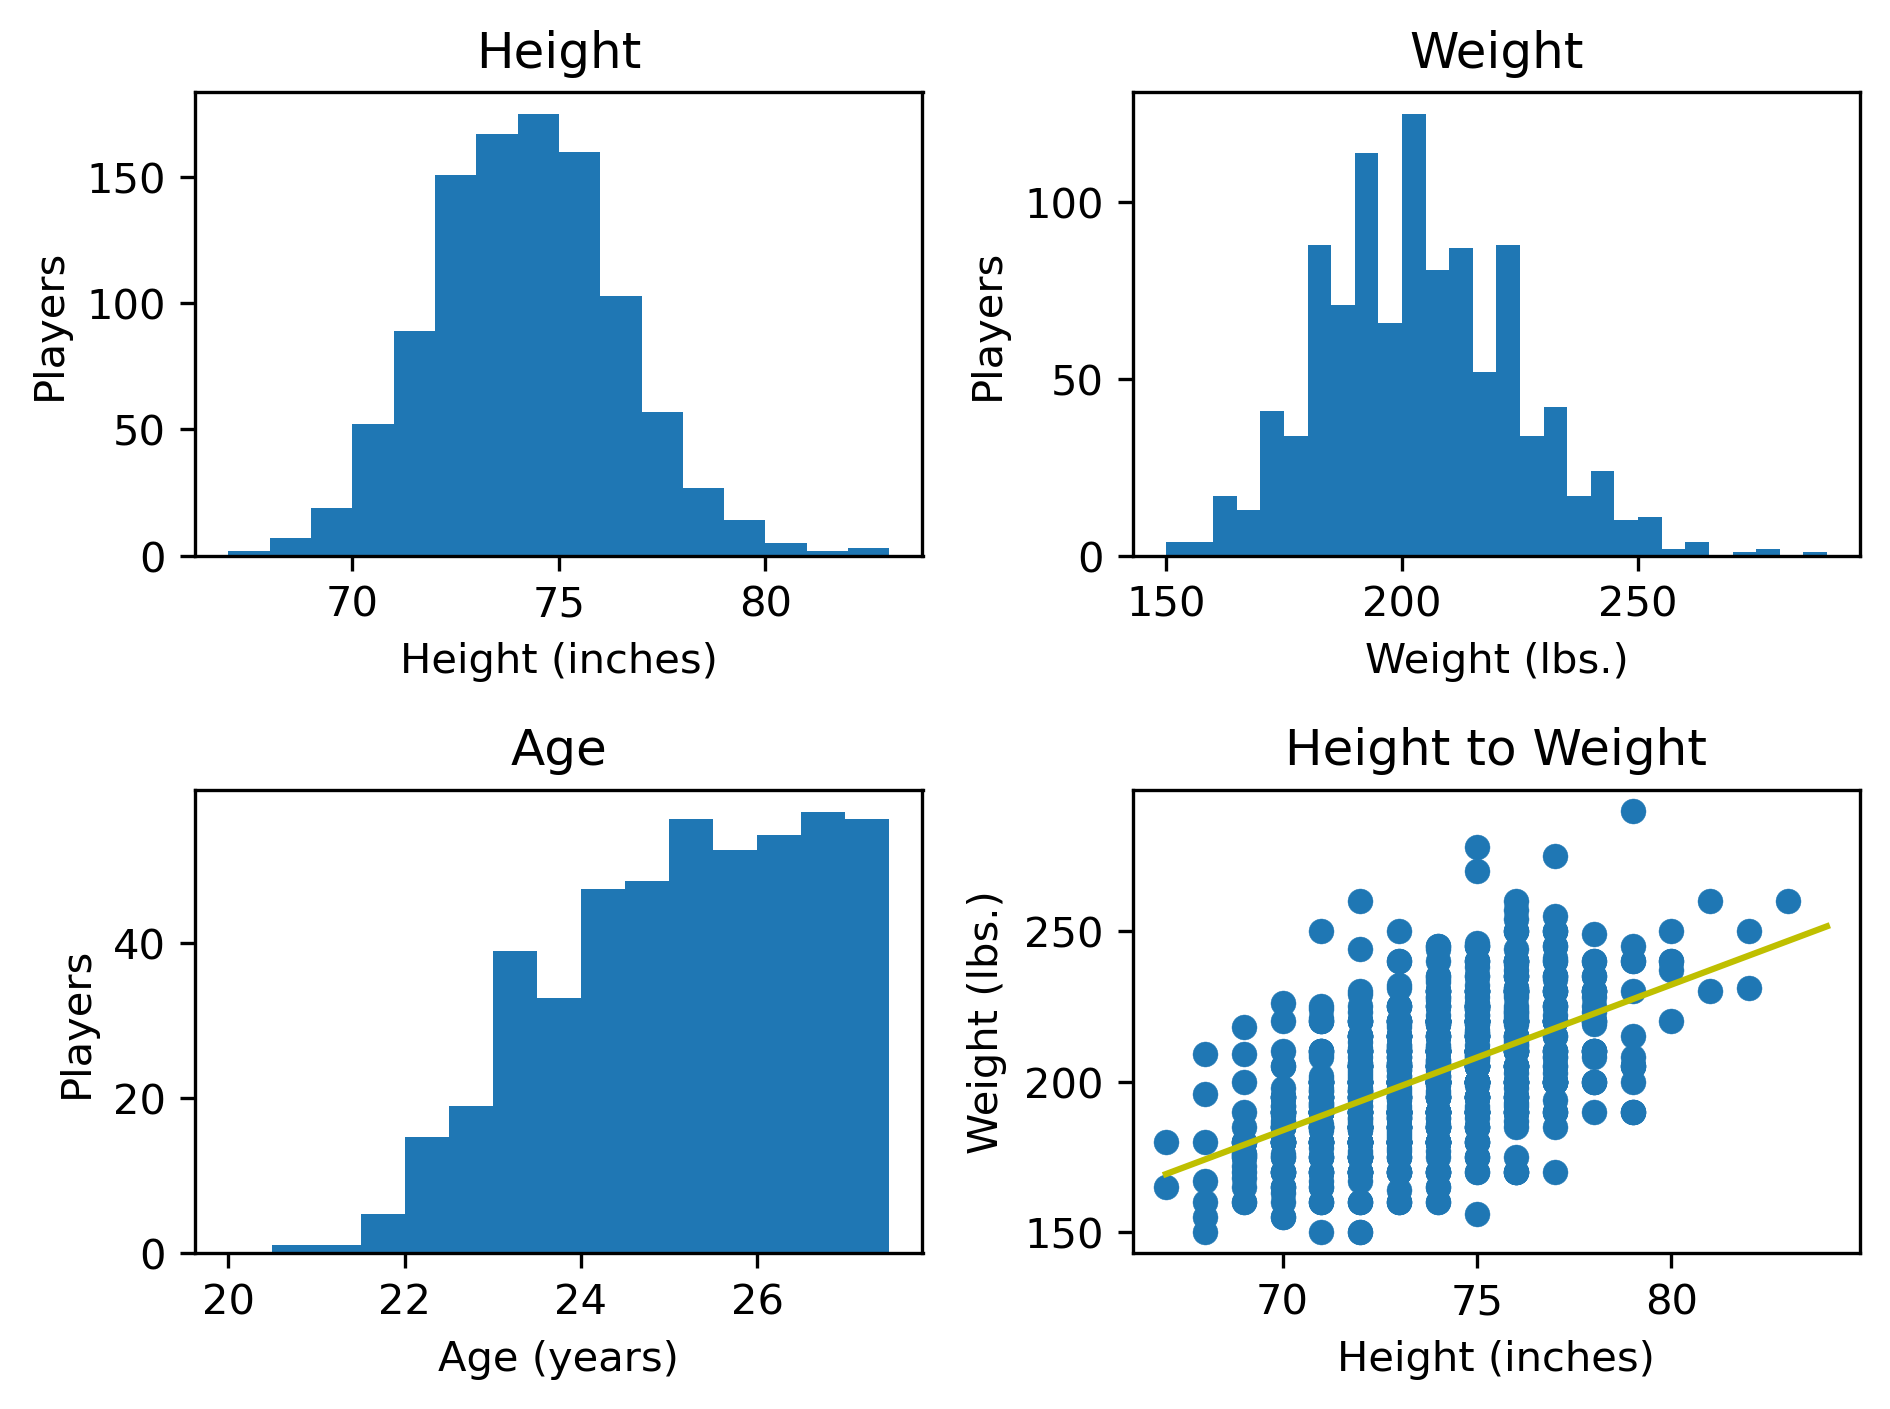

In [7]:
height, weight, age = np.load("MLB.npy").T
#plot 1
bin = np.arange(67,84)
plt.subplot(221)
plt.title('Height')
plt.xlabel('Height (inches)')
plt.ylabel('Players')
plt.hist(height, bins=bin)
#plot 2
bin = np.arange(150,291,5)
plt.subplot(222)
plt.title('Weight')
plt.xlabel('Weight (lbs.)')
plt.ylabel('Players')
plt.hist(weight, bins=bin)
#plot 3
bin = np.arange(20,28,.5)
plt.subplot(223)
plt.title('Age')
plt.xlabel('Age (years)')
plt.ylabel('Players')
plt.hist(age, bins=bin)

#plot 4
plt.subplot(224)
plt.title('Height to Weight')
plt.scatter(height,weight,linewidths=.1)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs.)')
#do regression
slope,intercept = st.linregress(height,weight)[:2]
domain = np.linspace(67,84,100)
plt.plot(domain,slope*(domain) + intercept,color='y')




plt.tight_layout()
plt.show()

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with at least two better visualizations. Include line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

Text(0.5, 1.0, 'Earthquakes Per Year')

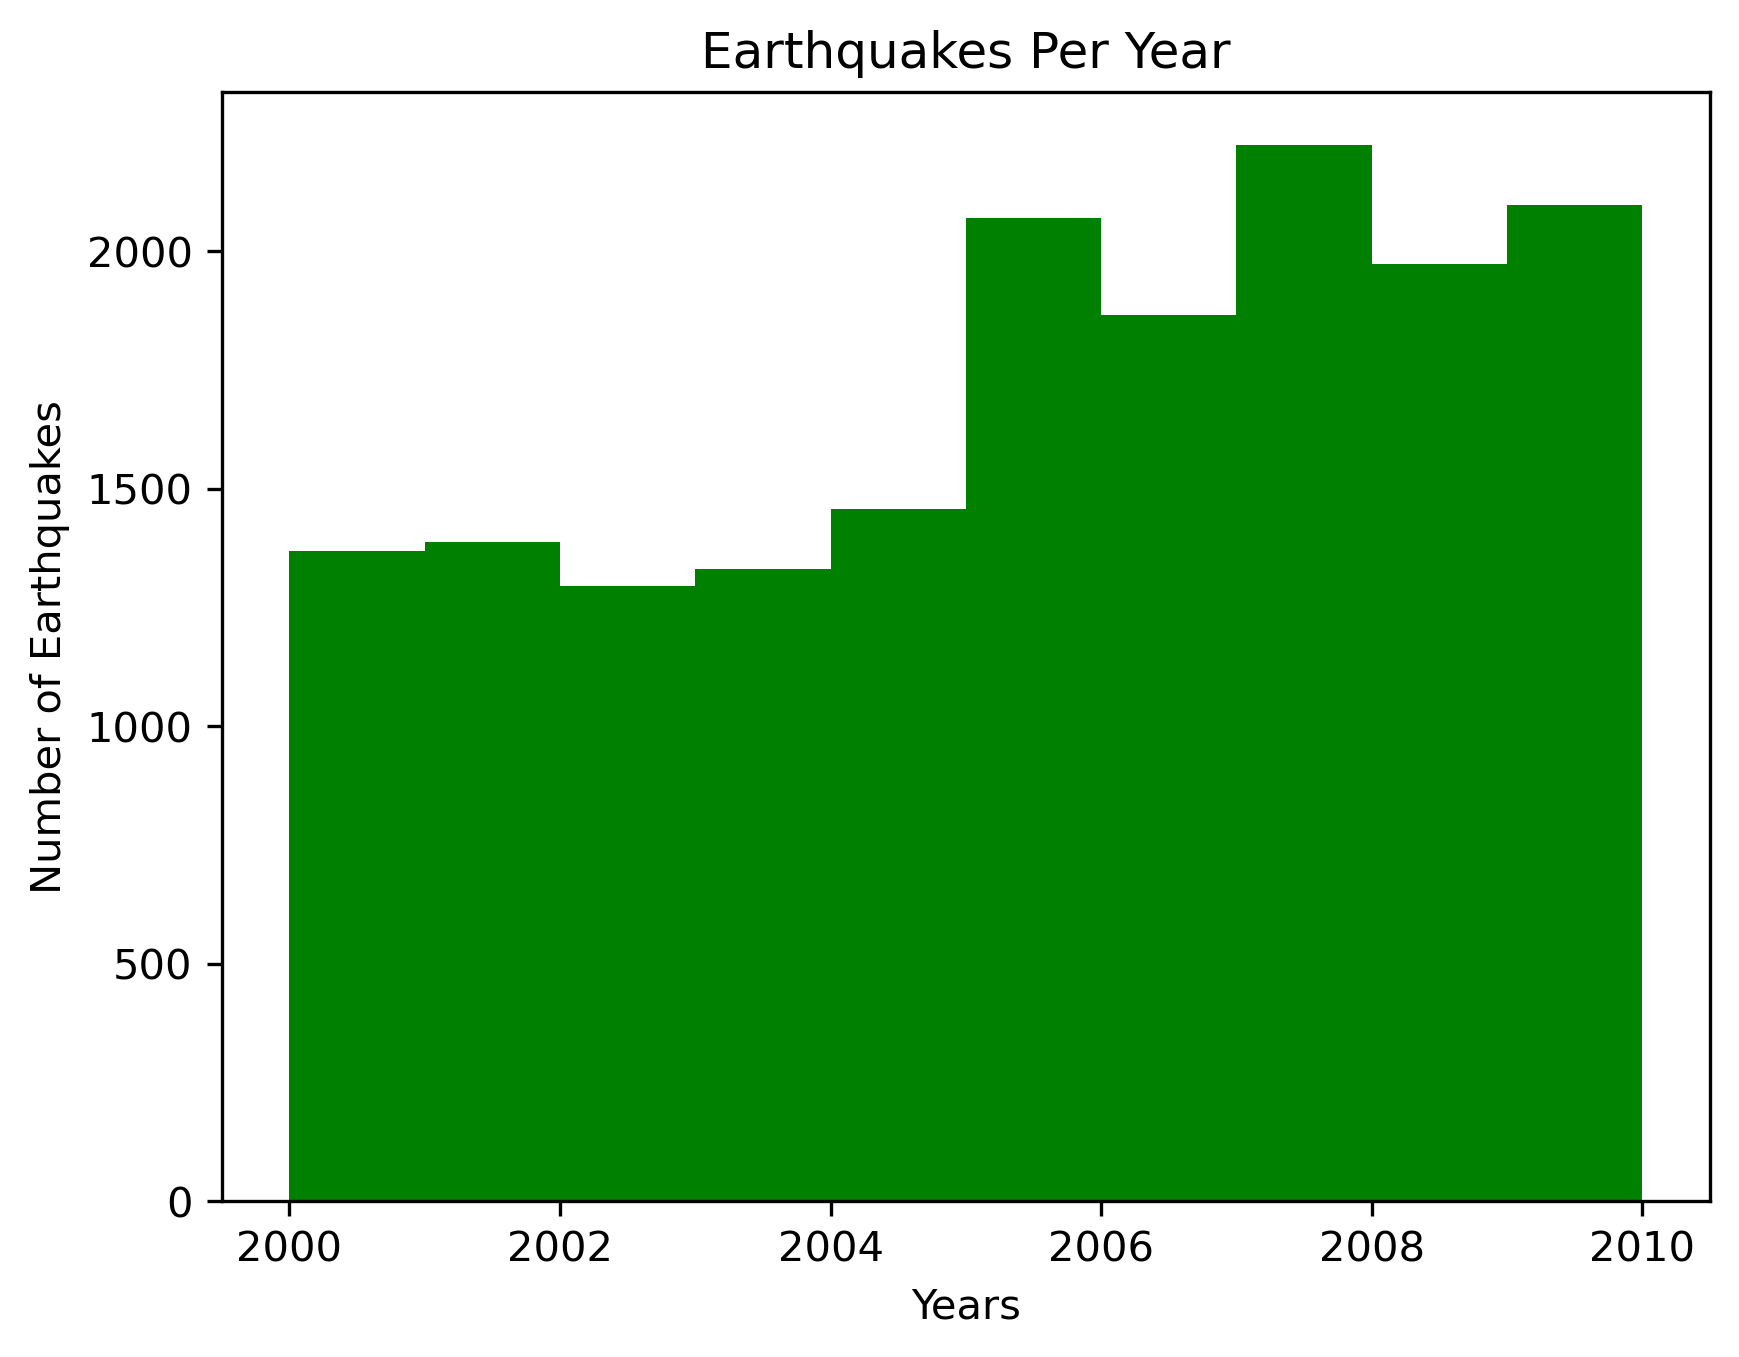

In [8]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T
#plot how many earthquakes happened every year
bin = np.arange(2000,2011)
plt.hist(years,bins=bin,color='g')
plt.xlabel('Years')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes Per Year')

Text(0.5, 1.0, 'Number of each Magnitude')

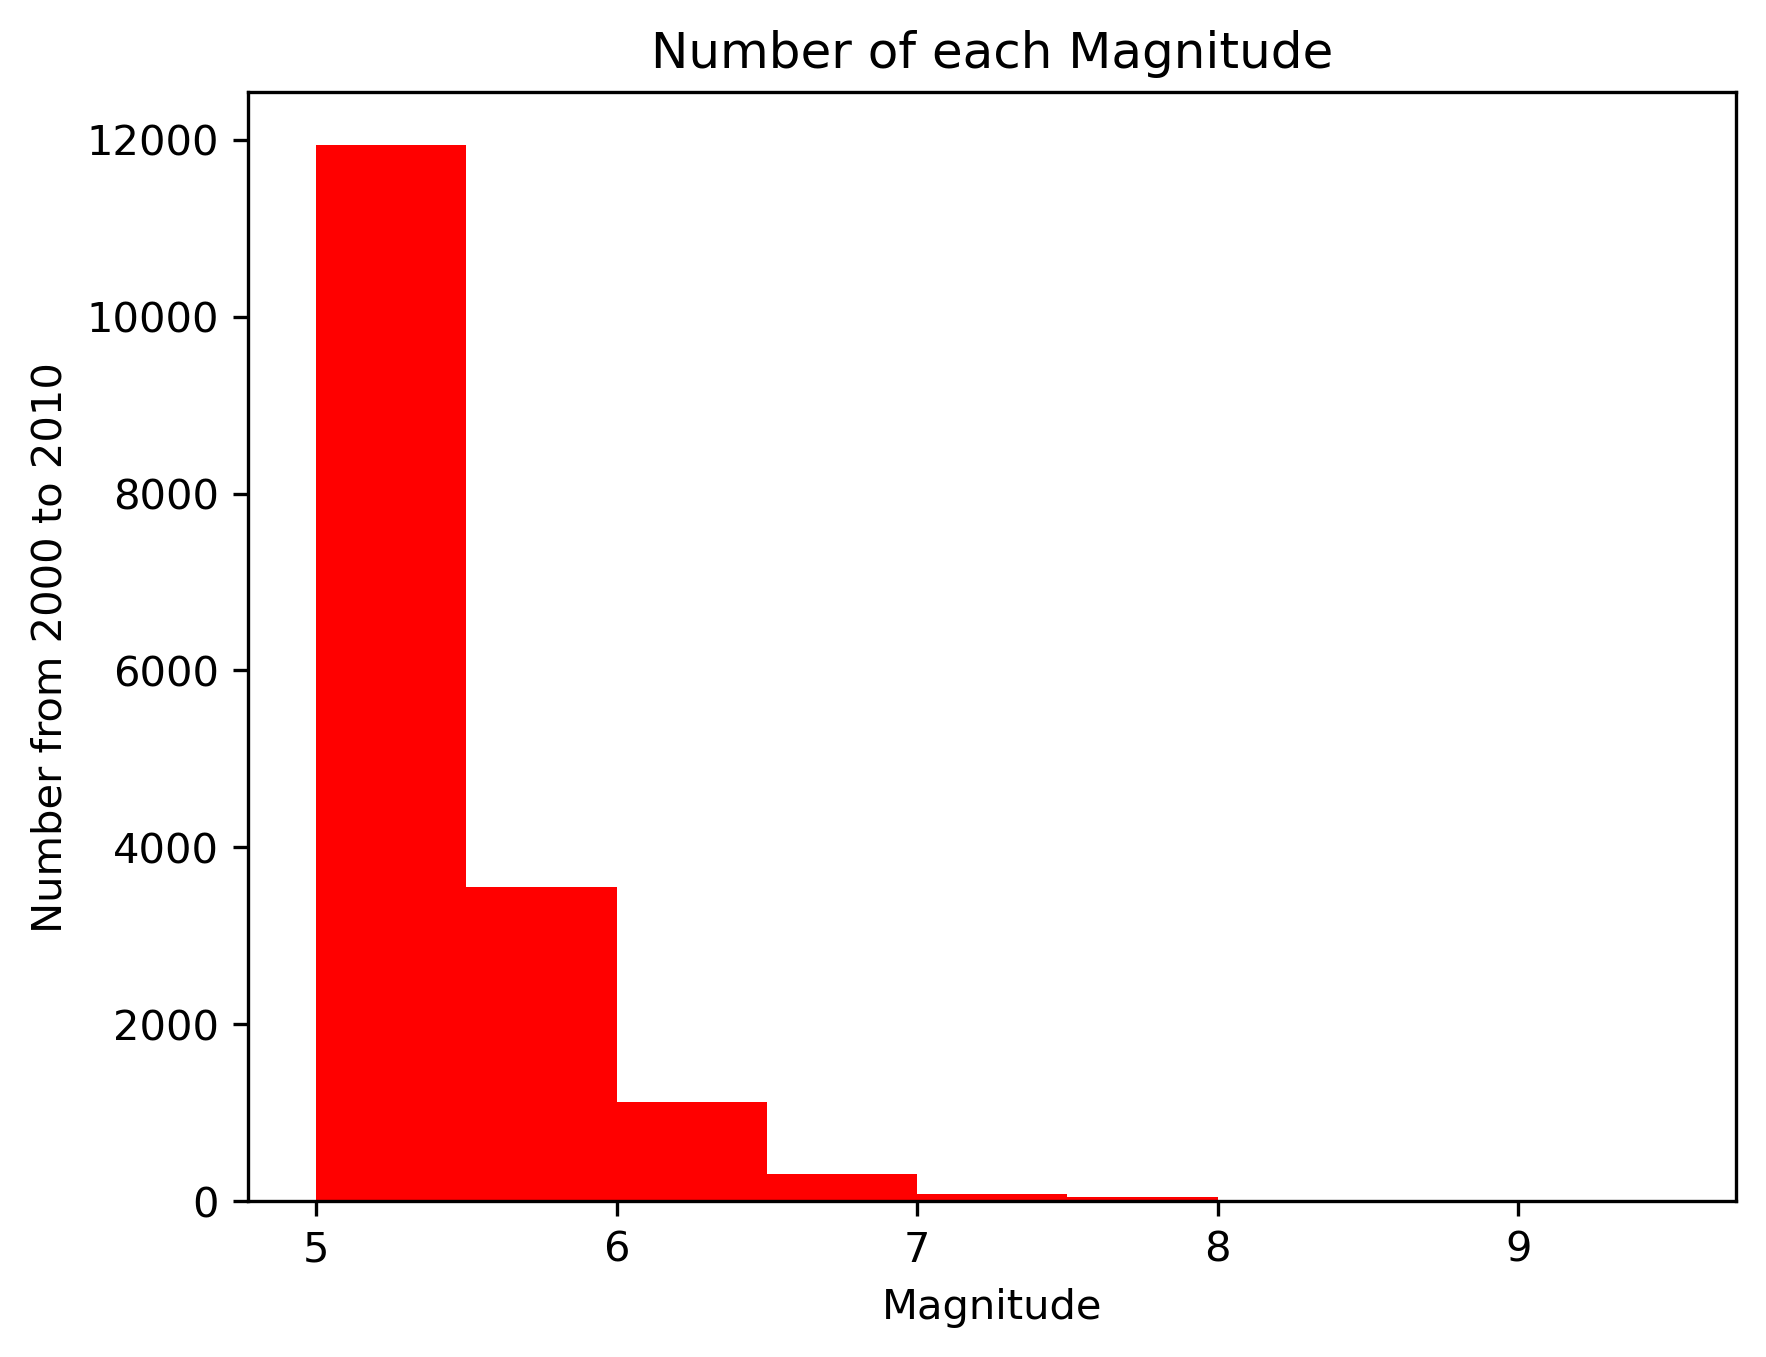

In [9]:
#plot how many smaller earthquakes happen compared to bigger ones.
bin = np.arange(5,10,.5)
plt.hist(magnitudes,bins=bin,color='r')
plt.xlabel('Magnitude')
plt.ylabel('Number from 2000 to 2010')
plt.title('Number of each Magnitude')

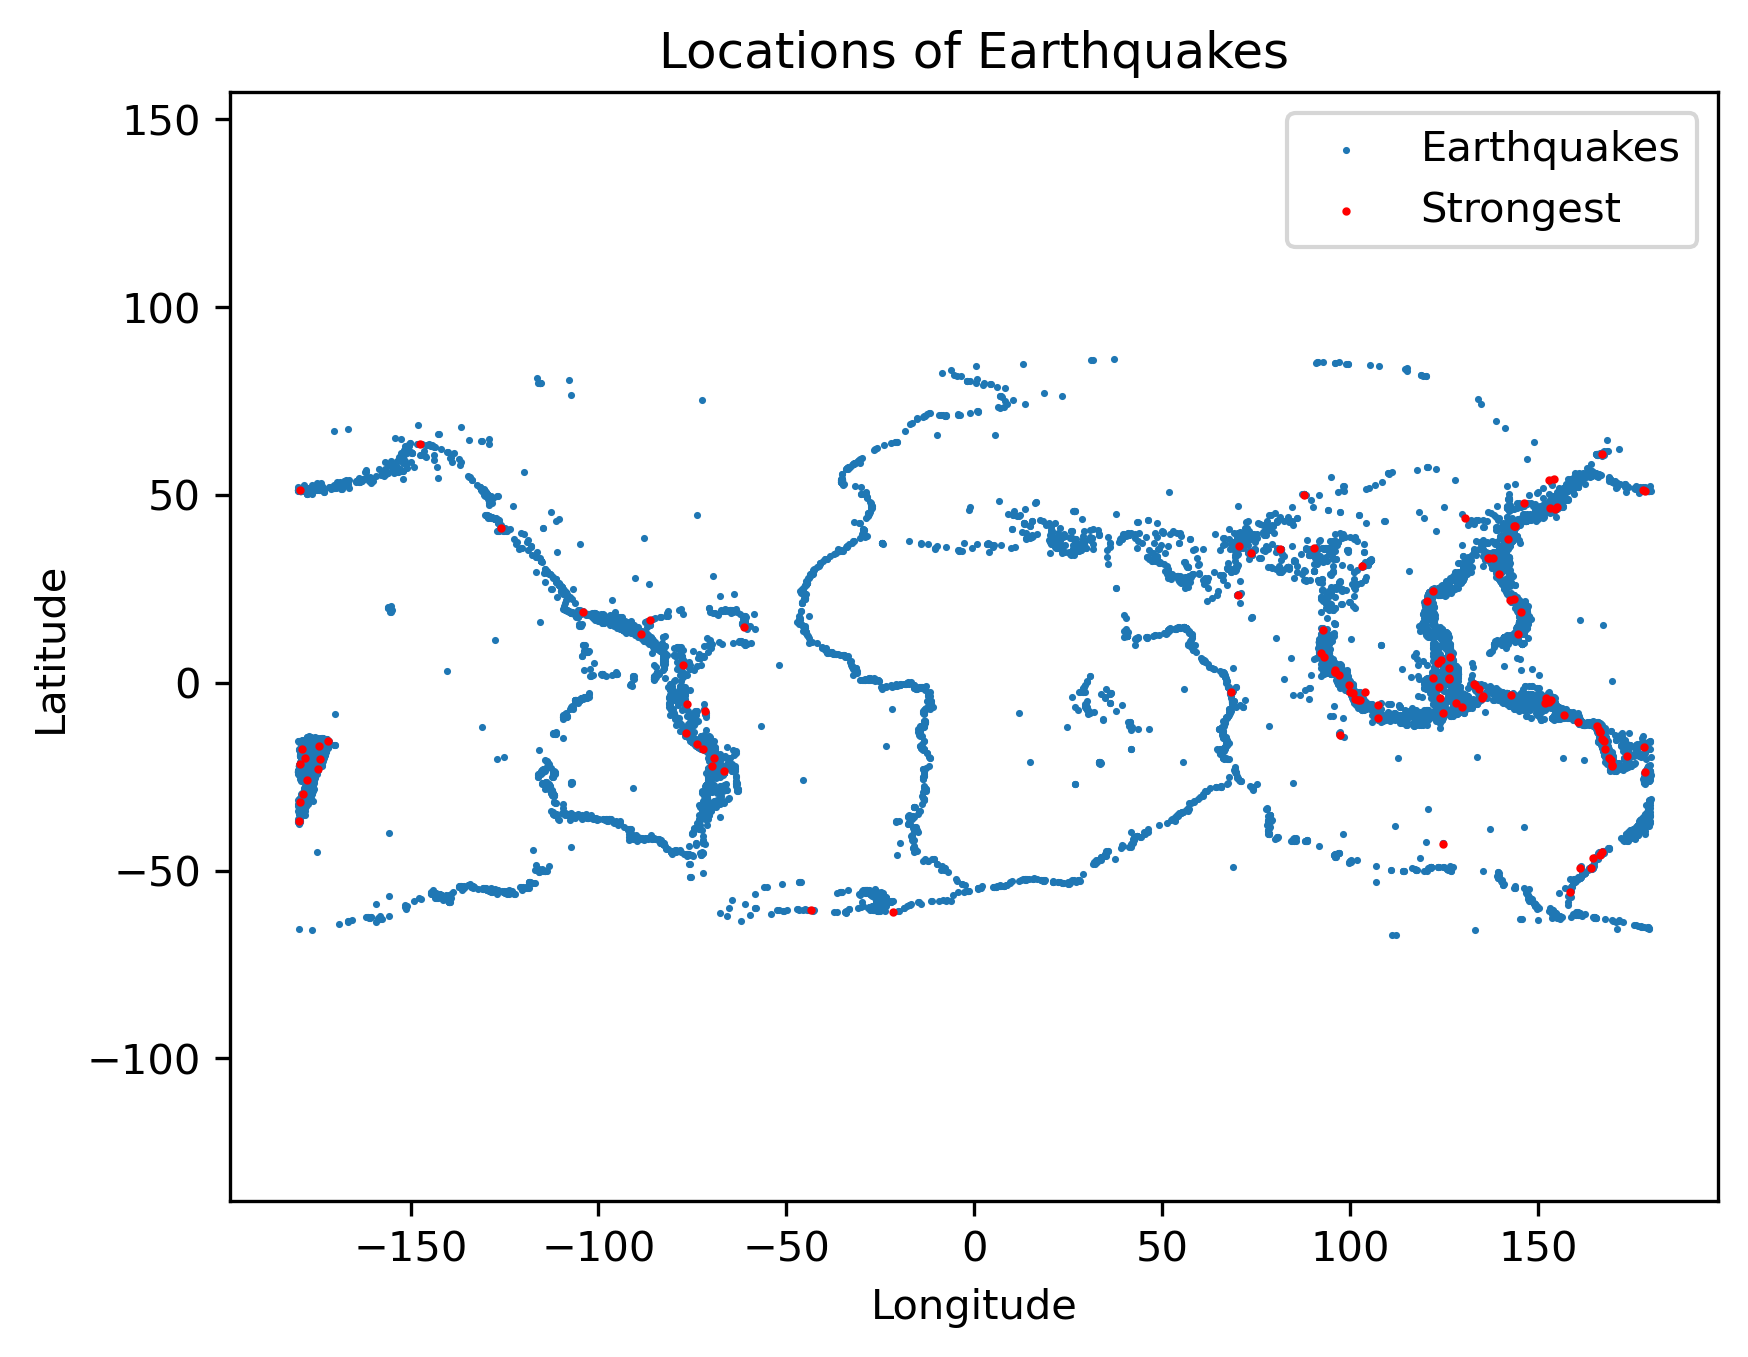

In [15]:
#plot where they happen on the planet
plt.scatter(longitude,latitude,s=.5)
mask = magnitudes > 7
plt.scatter(longitude[mask],latitude[mask],s=1,color='r')
plt.axis('equal')
plt.title('Locations of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(('Earthquakes','Strongest'))

### Problem 5

The _Rosenbrock function_ is defined as $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Also plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

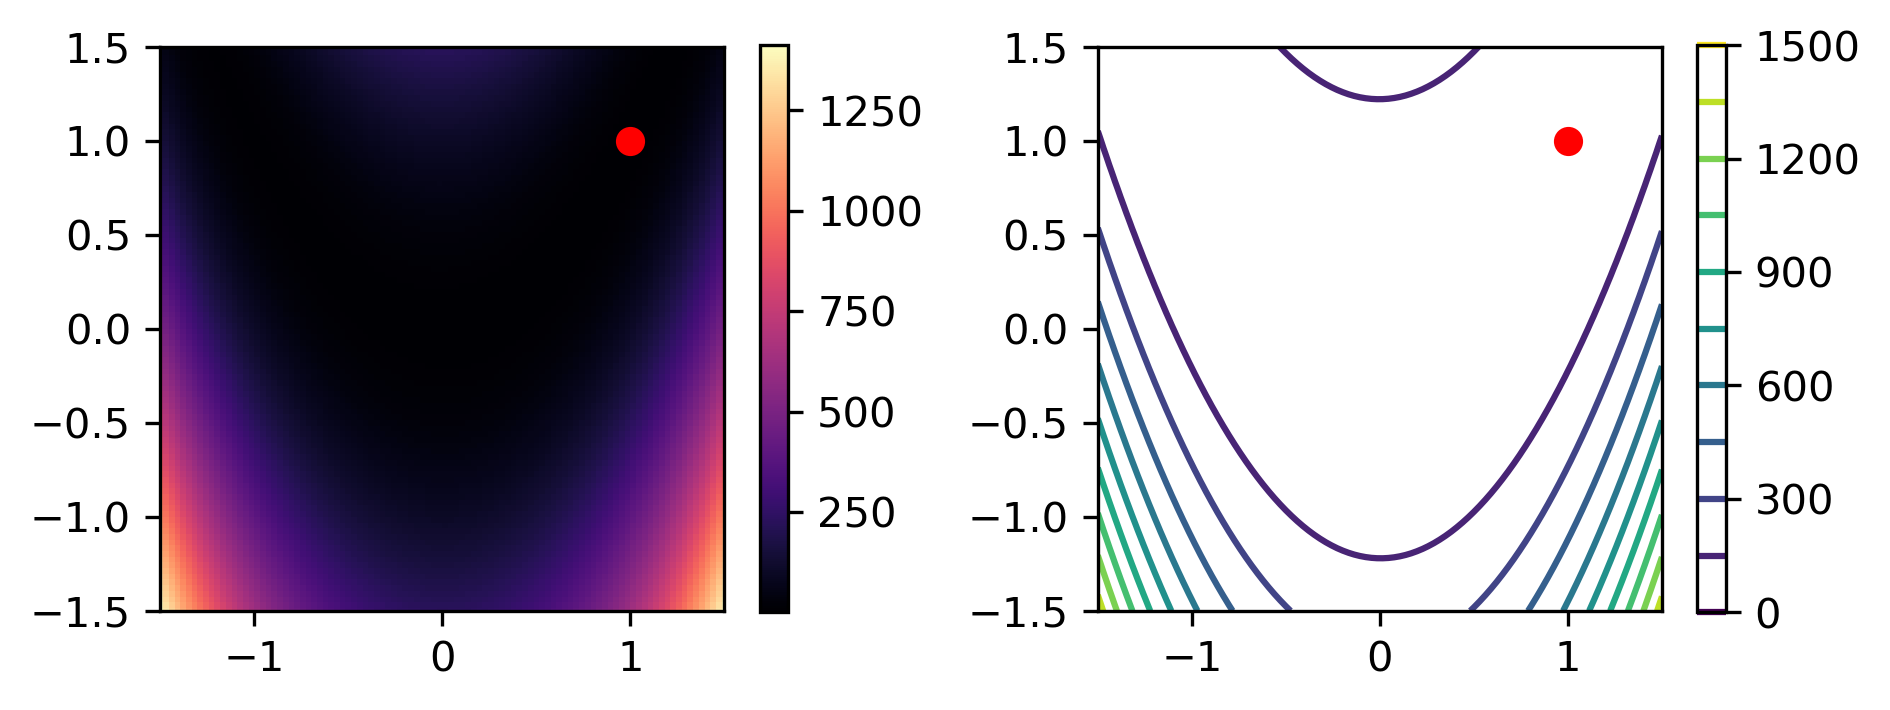

In [92]:
#create the domain
x = np.linspace(-1.5,1.5,100)
X,Y = np.meshgrid(x,x) 
Z = (1 - X)**2 + 100*(Y - X**2)**2
plot_lim = [-1.5,1.5]

#plot the heat and contour maps
plt.subplot(121,autoscale_on=False, aspect='equal',
            xlim=plot_lim, ylim=plot_lim)
plt.pcolormesh(X, Y, Z, cmap="magma") # Heat map.
plt.colorbar(shrink=0.42) 
plt.plot([1],[1],marker='o',color='r') #plot of the minimizer

plt.subplot(122,autoscale_on=False, aspect='equal',
            xlim=plot_lim, ylim=plot_lim)
plt.contour(X, Y, Z, 12, cmap="viridis") #contour map
plt.colorbar(shrink=0.42)
plt.plot([1],[1],marker='o',color='r') #plot of the minimizer

plt.tight_layout()
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

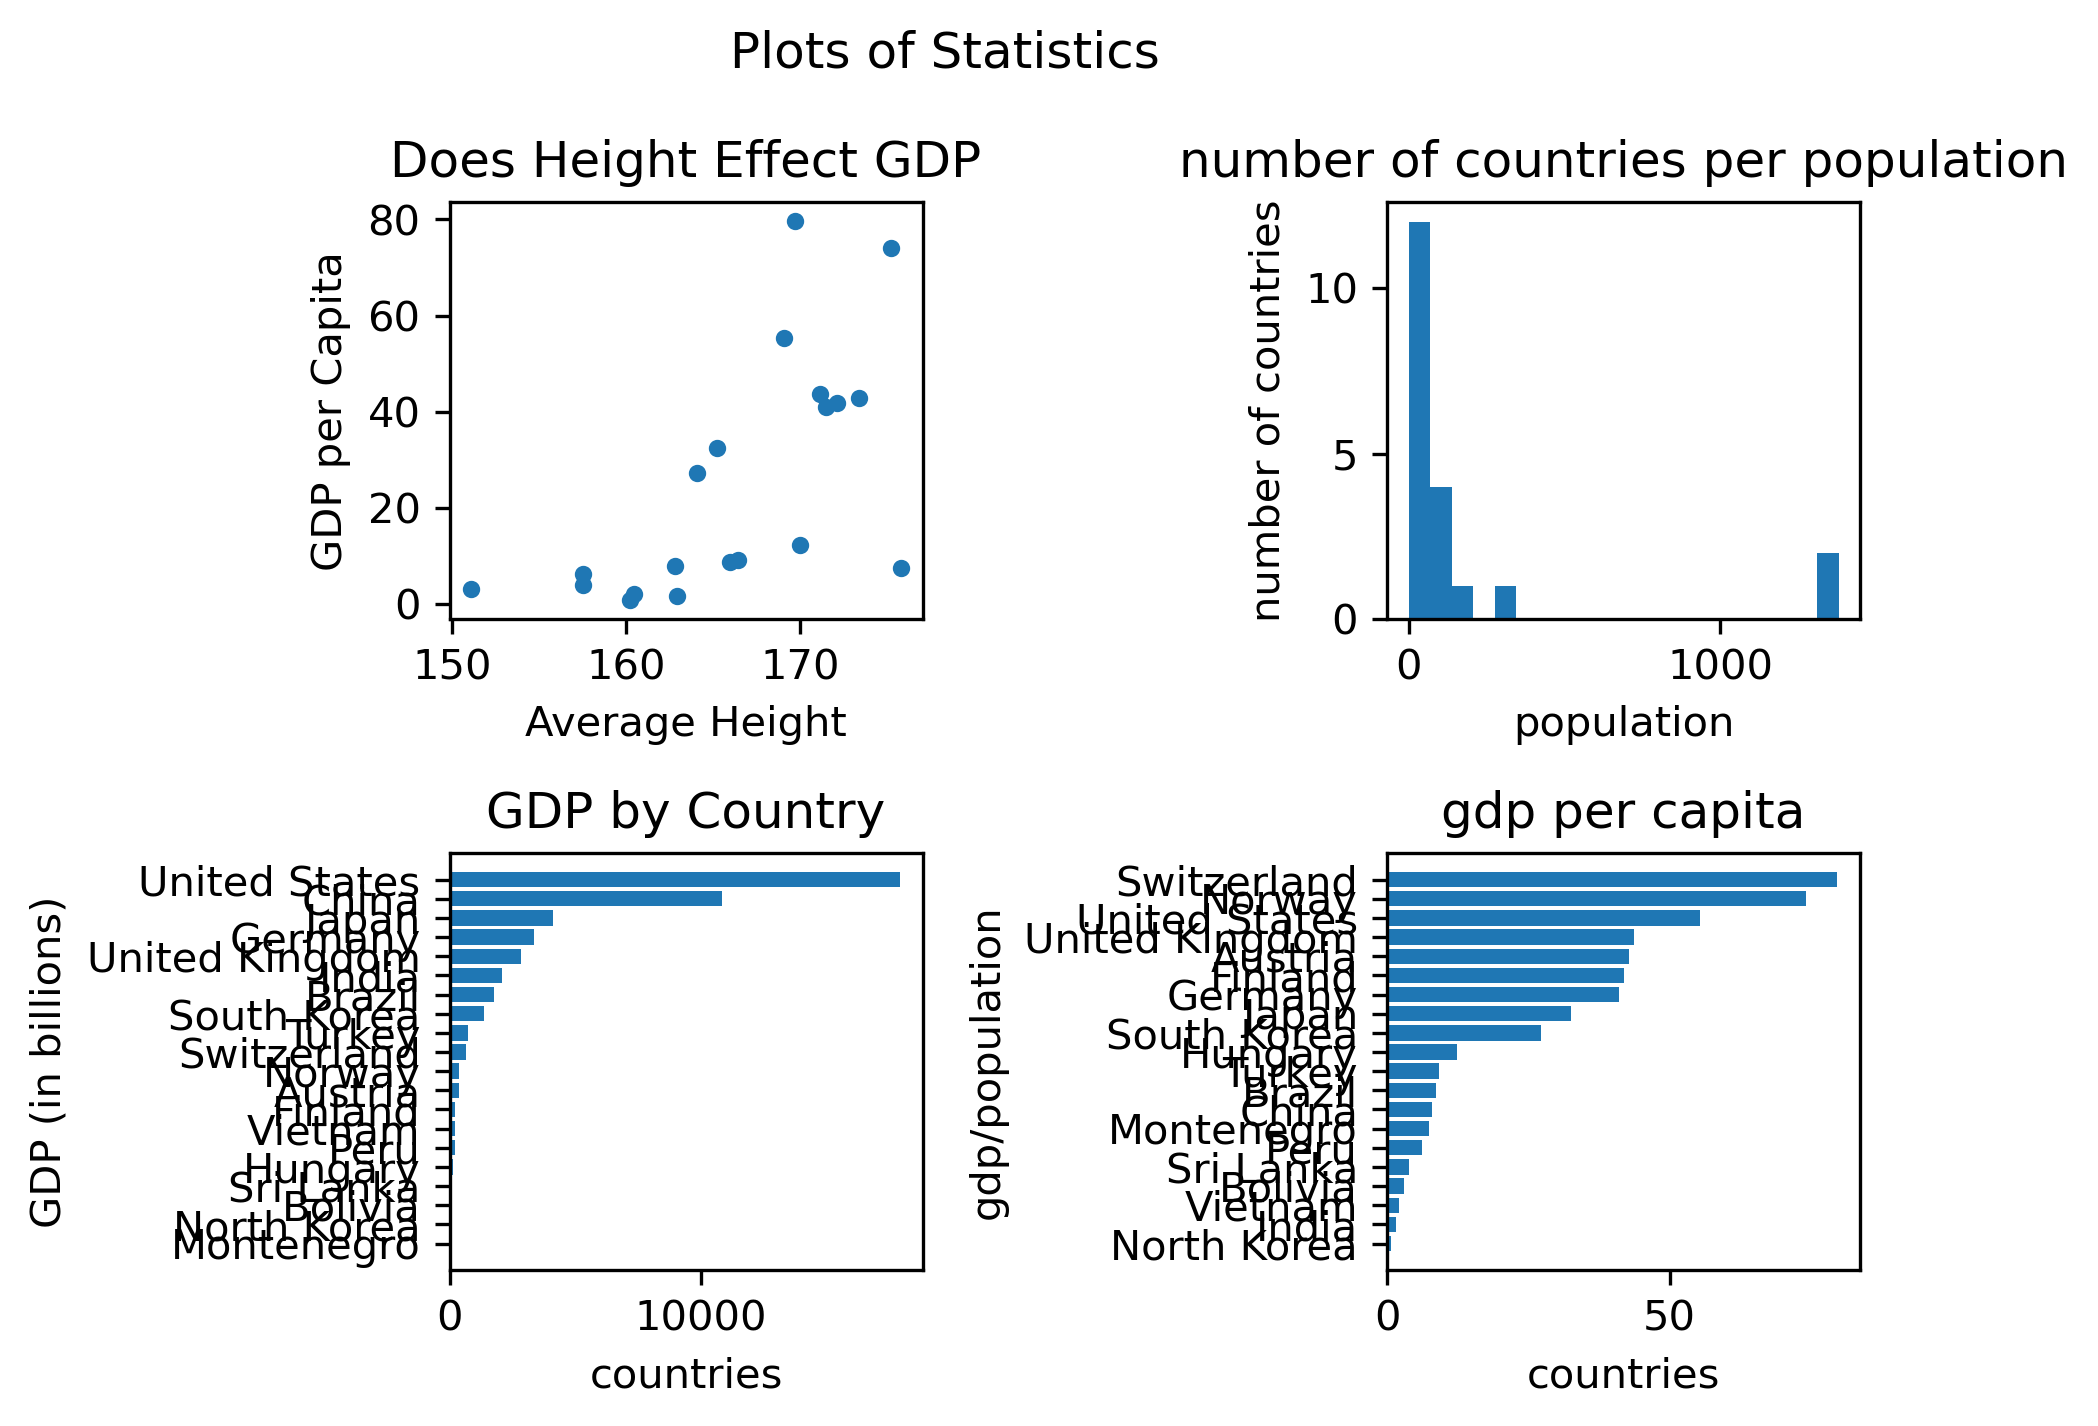

In [24]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

plt.suptitle('Plots of Statistics')
#plot 1
plt.subplot(221)
plt.scatter((male+female)/2,gdp/population,s=10) #calculate average height
plt.xlabel('Average Height')
plt.ylabel('GDP per Capita')
plt.title('Does Height Effect GDP')

#plot 2
plt.subplot(222)
plt.hist(population,bins=20)
plt.xlabel('population')
plt.ylabel('number of countries')
plt.title('number of countries per population')
#plot 3
plt.subplot(223)
plt.barh(countries[np.argsort(gdp)],gdp[np.argsort(gdp)])
plt.xlabel('countries')
plt.ylabel('GDP (in billions)')
plt.title('GDP by Country')

#plot 4
index = np.argsort(gdp/population) #index them from largest to smallest
plt.subplot(224)
plt.barh(countries[index],(gdp/population)[index])
plt.xlabel('countries')
plt.ylabel('gdp/population')
plt.title('gdp per capita')

plt.tight_layout()
plt.show()

In [23]:
#list my findings
print("The gdp of China and India is very high, but per capita it is very low revealing why they are still considered developing countries. Switzerland looks like it has a low gdp, but when looked at it when compared to the population it is the highest gdp per capita. In the scatter plot we see that the average height of a nation actually correlates a reasonable amount with the GDP per capita.")

The gdp of China and India is very high, but per capita it is very low revealing why they are still considered developing countries. Switzerland looks like it has a low gdp, but when looked at it when compared to the population it is the highest gdp per capita. In the scatter plot we see that the average height of a nation actually correlates a reasonable amount with the GDP per capita.
